In [1]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from pprint import pprint

Questions:

How is the COVID-19 virus affecting the Airline Industry? 
How has the COVID-19 virus affected North Carolina? 
How has the COVID-19 virus affected other areas? 
Does the COVID-19 virus have a stronger impact in certain areas?

How is the COVID-19 virus affecting the Airline Industry? 

In [2]:
#Where did we pull our data from?
#for flight data --> flightradar24.com
#for COVID-19 data --> data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases


#pull data from csv files
#flights
CharlotteFlights_Data = pd.read_csv("Resources/CharlotteChart.csv")
LAXFlights_Data = pd.read_csv("Resources/LAXchart.csv")
LittleRockchart_Data = pd.read_csv("Resources/LittleRockchart.csv")

#covid-19
AllStatesHistorical_Data = pd.read_csv("Resources/HistoricalStateData.csv")

In [3]:
#merging flight data
merge_df=pd.merge(CharlotteFlights_Data,LAXFlights_Data,on="DateTime")
merge_df

,DateTime,Scheduled flights_x,Tracked flights_x,Scheduled flights_y,Tracked flights_y
0,20200321,770,678,873,589
1,20200322,794,680,879,566
2,20200323,802,537,865,539
3,20200324,791,447,863,520
4,20200325,774,362,855,461
5,20200326,790,400,820,470
6,20200327,789,361,785,451
7,20200328,748,349,863,431
8,20200329,784,366,864,441
9,20200330,787,340,809,422


In [4]:
merge_df1=pd.merge(merge_df,LittleRockchart_Data,on="DateTime")
merge_df1

,DateTime,Scheduled flights_x,Tracked flights_x,Scheduled flights_y,Tracked flights_y,Scheduled flights,Tracked flights
0,20200321,770,678,873,589,58,46
1,20200322,794,680,879,566,49,34
2,20200323,802,537,865,539,53,35
3,20200324,791,447,863,520,58,37
4,20200325,774,362,855,461,56,38
5,20200326,790,400,820,470,58,34
6,20200327,789,361,785,451,59,33
7,20200328,748,349,863,431,44,25
8,20200329,784,366,864,441,45,19
9,20200330,787,340,809,422,54,24


In [5]:
#merge_df1.dtypes
merge_df2 = merge_df1[(merge_df1['DateTime'] >= 20200305) & (merge_df1['DateTime'] <= 20200417)]
merge_df2

,DateTime,Scheduled flights_x,Tracked flights_x,Scheduled flights_y,Tracked flights_y,Scheduled flights,Tracked flights
0,20200321,770,678,873,589,58,46
1,20200322,794,680,879,566,49,34
2,20200323,802,537,865,539,53,35
3,20200324,791,447,863,520,58,37
4,20200325,774,362,855,461,56,38
5,20200326,790,400,820,470,58,34
6,20200327,789,361,785,451,59,33
7,20200328,748,349,863,431,44,25
8,20200329,784,366,864,441,45,19
9,20200330,787,340,809,422,54,24


In [6]:
#rename columns
#note that Little Rock Arkansas airport is now named Arkansas.


merge_df3 = merge_df2.rename(columns={"Scheduled flights_x" : "Charlotte Scheduled Flights",
                          "Tracked flights_x":"Charlotte Tracked Flights",
                          "Scheduled flights_y":"LA Scheduled Flights",
                          "Tracked flights_y":"LA Tracked Flights",
                          "Scheduled flights" :"Arkansas Scheduled Flights", 
                          "Tracked flights":"Arkansas Tracked Flights"})
merge_df3

,DateTime,Charlotte Scheduled Flights,Charlotte Tracked Flights,LA Scheduled Flights,LA Tracked Flights,Arkansas Scheduled Flights,Arkansas Tracked Flights
0,20200321,770,678,873,589,58,46
1,20200322,794,680,879,566,49,34
2,20200323,802,537,865,539,53,35
3,20200324,791,447,863,520,58,37
4,20200325,774,362,855,461,56,38
5,20200326,790,400,820,470,58,34
6,20200327,789,361,785,451,59,33
7,20200328,748,349,863,431,44,25
8,20200329,784,366,864,441,45,19
9,20200330,787,340,809,422,54,24


In [7]:
Total_Scheduled = (merge_df3['Charlotte Scheduled Flights'].sum() + merge_df3['LA Scheduled Flights'].sum() + merge_df3['Arkansas Scheduled Flights'].sum())
Total_Tracked = (merge_df3['Charlotte Tracked Flights'].sum() + merge_df3['LA Tracked Flights'].sum() + merge_df3['Arkansas Tracked Flights'].sum())

print(f'Total flights scheduled for the 3 areas are {Total_Scheduled}.')
print(f'Total flights tracked for the 3 areas are {Total_Tracked}.')
    

Total flights scheduled for the 3 areas are 39793.
Total flights tracked for the 3 areas are 21164.


How has the COVID-19 virus specifically affected North Carolina? 

In [8]:
#Clean data to only look at NC.
north_carolina_df = AllStatesHistorical_Data.loc[AllStatesHistorical_Data["state"] == "NC"]
north_carolina_df

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
30,20200417,NC,5859.0,67122.0,NaN,429.0,NaN,NaN,NaN,NaN,...,NaN,72981.0,72981.0,72981.0,37,21.0,0.0,1670.0,394.0,2064.0
86,20200416,NC,5465.0,65452.0,NaN,452.0,NaN,NaN,NaN,NaN,...,NaN,70917.0,70917.0,70917.0,37,14.0,0.0,2748.0,342.0,3090.0
142,20200415,NC,5123.0,62704.0,NaN,431.0,NaN,NaN,NaN,NaN,...,NaN,67827.0,67827.0,67827.0,37,9.0,0.0,2689.0,99.0,2788.0
198,20200414,NC,5024.0,60015.0,NaN,418.0,NaN,NaN,NaN,NaN,...,NaN,65039.0,65039.0,65039.0,37,22.0,0.0,1443.0,208.0,1651.0
254,20200413,NC,4816.0,58572.0,NaN,313.0,NaN,NaN,NaN,NaN,...,NaN,63388.0,63388.0,63388.0,37,5.0,0.0,953.0,296.0,1249.0
310,20200412,NC,4520.0,57619.0,NaN,331.0,NaN,NaN,NaN,NaN,...,NaN,62139.0,62139.0,62139.0,37,1.0,0.0,1538.0,208.0,1746.0
366,20200411,NC,4312.0,56081.0,NaN,362.0,NaN,NaN,NaN,NaN,...,NaN,60393.0,60393.0,60393.0,37,6.0,0.0,2344.0,404.0,2748.0
422,20200410,NC,3908.0,53737.0,NaN,423.0,NaN,NaN,NaN,NaN,...,NaN,57645.0,57645.0,57645.0,37,9.0,0.0,9579.0,257.0,9836.0
478,20200409,NC,3651.0,44158.0,NaN,398.0,NaN,NaN,NaN,NaN,...,NaN,47809.0,47809.0,47809.0,37,12.0,0.0,4597.0,225.0,4822.0
534,20200408,NC,3426.0,39561.0,NaN,386.0,NaN,NaN,NaN,NaN,...,NaN,42987.0,42987.0,42987.0,37,7.0,0.0,1700.0,205.0,1905.0


In [9]:
#To get our specific dates to match flight data
north_carolina_df2 = north_carolina_df[(north_carolina_df['date'] >= 20200321) & (north_carolina_df['date'] <= 20200417)]
north_carolina_df2

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
30,20200417,NC,5859.0,67122.0,NaN,429.0,NaN,NaN,NaN,NaN,...,NaN,72981.0,72981.0,72981.0,37,21.0,0.0,1670.0,394.0,2064.0
86,20200416,NC,5465.0,65452.0,NaN,452.0,NaN,NaN,NaN,NaN,...,NaN,70917.0,70917.0,70917.0,37,14.0,0.0,2748.0,342.0,3090.0
142,20200415,NC,5123.0,62704.0,NaN,431.0,NaN,NaN,NaN,NaN,...,NaN,67827.0,67827.0,67827.0,37,9.0,0.0,2689.0,99.0,2788.0
198,20200414,NC,5024.0,60015.0,NaN,418.0,NaN,NaN,NaN,NaN,...,NaN,65039.0,65039.0,65039.0,37,22.0,0.0,1443.0,208.0,1651.0
254,20200413,NC,4816.0,58572.0,NaN,313.0,NaN,NaN,NaN,NaN,...,NaN,63388.0,63388.0,63388.0,37,5.0,0.0,953.0,296.0,1249.0
310,20200412,NC,4520.0,57619.0,NaN,331.0,NaN,NaN,NaN,NaN,...,NaN,62139.0,62139.0,62139.0,37,1.0,0.0,1538.0,208.0,1746.0
366,20200411,NC,4312.0,56081.0,NaN,362.0,NaN,NaN,NaN,NaN,...,NaN,60393.0,60393.0,60393.0,37,6.0,0.0,2344.0,404.0,2748.0
422,20200410,NC,3908.0,53737.0,NaN,423.0,NaN,NaN,NaN,NaN,...,NaN,57645.0,57645.0,57645.0,37,9.0,0.0,9579.0,257.0,9836.0
478,20200409,NC,3651.0,44158.0,NaN,398.0,NaN,NaN,NaN,NaN,...,NaN,47809.0,47809.0,47809.0,37,12.0,0.0,4597.0,225.0,4822.0
534,20200408,NC,3426.0,39561.0,NaN,386.0,NaN,NaN,NaN,NaN,...,NaN,42987.0,42987.0,42987.0,37,7.0,0.0,1700.0,205.0,1905.0


In [10]:
#To create a dataframe with just the dates, state, and positive cases
north_carolina_df3 = north_carolina_df2[["date","state","positive"]].copy()
#To display our clean dataframe
north_carolina_df3

,date,state,positive
30,20200417,NC,5859.0
86,20200416,NC,5465.0
142,20200415,NC,5123.0
198,20200414,NC,5024.0
254,20200413,NC,4816.0
310,20200412,NC,4520.0
366,20200411,NC,4312.0
422,20200410,NC,3908.0
478,20200409,NC,3651.0
534,20200408,NC,3426.0


In [11]:
north_carolina_df4 = north_carolina_df3.sort_values(by='date', ascending=True)
north_carolina_df4

,date,state,positive
1542,20200321,NC,184.0
1486,20200322,NC,255.0
1430,20200323,NC,297.0
1374,20200324,NC,398.0
1318,20200325,NC,504.0
1262,20200326,NC,636.0
1206,20200327,NC,763.0
1150,20200328,NC,935.0
1094,20200329,NC,1040.0
1038,20200330,NC,1307.0


How has the COVID-19 virus affected other areas? 

In [12]:
#Pulling and cleaning data for Arkansas.
#Why did we pick Arkansas to compare?

Arkansas_df = AllStatesHistorical_Data.loc[AllStatesHistorical_Data["state"] == "AR"]
#Arkansas_df.head()

Arkansas_df2 = Arkansas_df[(Arkansas_df['date'] >= 20200321) & (Arkansas_df['date'] <= 20200417)]
#Arkansas_df2.head()

Arkansas_df3 = Arkansas_df2[["date","state","positive"]].copy()
#Arkansas_df3.head()

Arkansas_df4 = Arkansas_df3.sort_values(by='date', ascending=True)
Arkansas_df4.head()

,date,state,positive
1514,20200321,AR,118.0
1458,20200322,AR,165.0
1402,20200323,AR,174.0
1346,20200324,AR,218.0
1290,20200325,AR,280.0


In [13]:
#LA data cleaned
LA_df = AllStatesHistorical_Data.loc[AllStatesHistorical_Data["state"] == "CA"]
#LA_df.head()

LA_df2 = LA_df[(LA_df['date'] >= 20200321) & (LA_df['date'] <= 20200417)]
#LA_df.head()

LA_df3 = LA_df2[["date","state","positive"]].copy()
#LA_df.head()

LA_df4 = LA_df3.sort_values(by='date', ascending=True)
LA_df4.head()

,date,state,positive
1517,20200321,CA,1279.0
1461,20200322,CA,1536.0
1405,20200323,CA,1733.0
1349,20200324,CA,2102.0
1293,20200325,CA,2355.0


Does the COVID-19 virus have a stronger impact in certain areas?

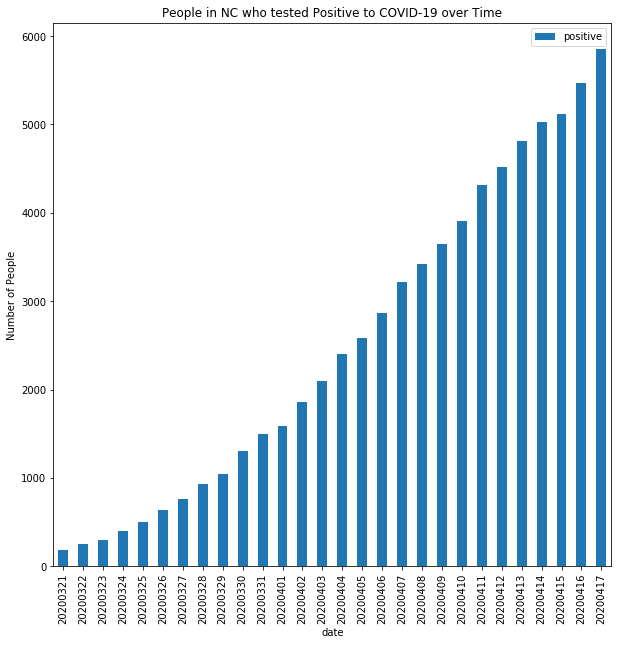

In [15]:
#illustrating positive case count in NC
north_carolina_df4.plot(kind="bar",x="date", y="positive", figsize=(10,10), title="People in NC who tested Positive to COVID-19 over Time")
plt.ylabel('Number of People')
plt.savefig('Images/NCPeopleTestingPositive.png')


 The mean of North Carolinas positive COVID cases is 2519.035714285714
 The median of North Carolinas positive COVID cases is 2247.5


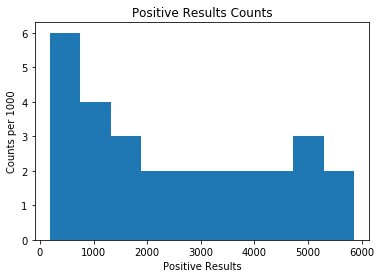

In [16]:
positive_results = north_carolina_df4["positive"]
mean_numpy = np.mean(positive_results)
print(f" The mean of North Carolinas positive COVID cases is {mean_numpy}")

median_numpy = np.median(positive_results)
print(f" The median of North Carolinas positive COVID cases is {median_numpy}")

plt.hist(positive_results)
plt.xlabel('Positive Results')
plt.ylabel('Counts per 1000')
plt.title('Positive Results Counts')
plt.savefig('Images/NCHistogramPeopleTestingPositive.png')
plt.show()

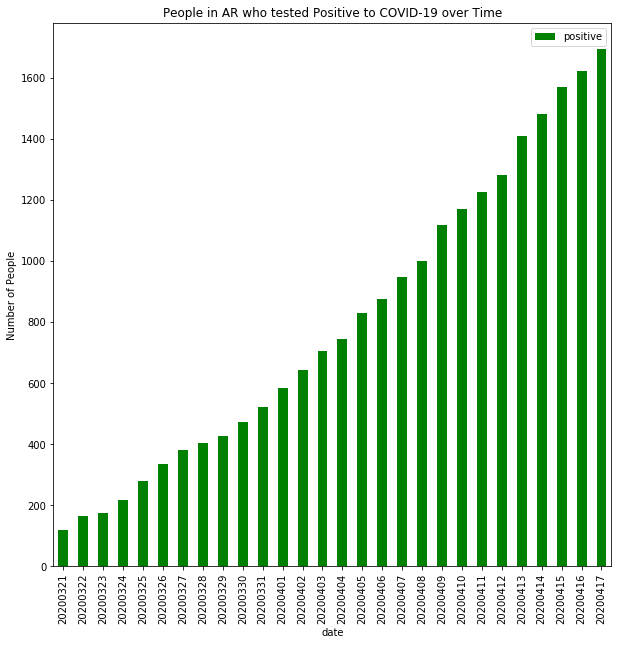

In [17]:
Arkansas_df4.plot(kind="bar",x="date", y="positive", figsize=(10,10), color='g', title="People in AR who tested Positive to COVID-19 over Time")
plt.ylabel('Number of People')
plt.savefig('Images/ARPeopleTestingPositive.png')

 The mean of North Carolinas positive COVID cases is 799.7142857142857
 The median of North Carolinas positive COVID cases is 723.5


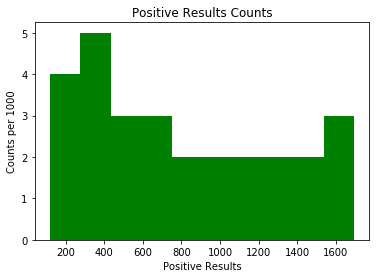

In [18]:
positive_results2 = Arkansas_df4["positive"]
mean_numpy = np.mean(positive_results2)
print(f" The mean of North Carolinas positive COVID cases is {mean_numpy}")

median_numpy = np.median(positive_results2)
print(f" The median of North Carolinas positive COVID cases is {median_numpy}")

plt.hist(positive_results2, color='g')
plt.xlabel('Positive Results')
plt.ylabel('Counts per 1000')
plt.title('Positive Results Counts')
plt.savefig('Images/ARHistogramPeopleTestingPositive.png')
plt.show()

How has COVID-19 affect other areas?

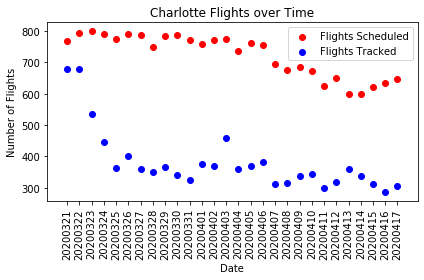

In [19]:
#Illustrations of data.
#compare flights of Charlotte

x_axis = np.arange(len(merge_df3))
tick_locations = [value for value in x_axis]

a = plt.scatter(x_axis, merge_df3["Charlotte Scheduled Flights"], color='red')
b = plt.scatter(x_axis, merge_df3["Charlotte Tracked Flights"], color='blue')
plt.xticks(tick_locations, merge_df3["DateTime"], rotation="vertical")

plt.title('Charlotte Flights over Time')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.legend((a,b),('Flights Scheduled','Flights Tracked'),loc='best')
plt.tight_layout()
plt.savefig('Images/CharlotteFlights.png')

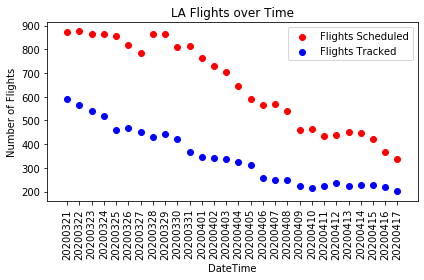

In [20]:
#compare flights of LA
x_axis = np.arange(len(merge_df3))
tick_locations = [value for value in x_axis]

plt.scatter(x_axis, merge_df3["LA Scheduled Flights"], color='red')
plt.scatter(x_axis, merge_df3["LA Tracked Flights"], color='blue')
plt.xticks(tick_locations, merge_df3["DateTime"], rotation="vertical")

plt.title('LA Flights over Time')
plt.xlabel('DateTime')
plt.ylabel('Number of Flights')
plt.legend((a,b),('Flights Scheduled','Flights Tracked'),loc='best')
plt.tight_layout()
plt.savefig('Images/LAFlights.png')

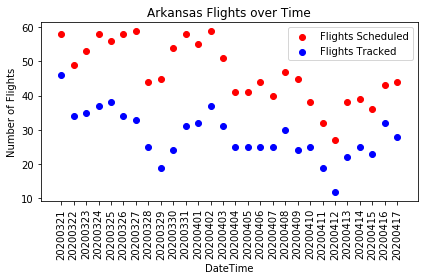

In [21]:
#compare flights of Arkansas
x_axis = np.arange(len(merge_df3))
tick_locations = [value for value in x_axis]

plt.scatter(x_axis, merge_df3["Arkansas Scheduled Flights"], color='red')
plt.scatter(x_axis, merge_df3["Arkansas Tracked Flights"], color='blue')
plt.xticks(tick_locations, merge_df3["DateTime"], rotation="vertical")

plt.title('Arkansas Flights over Time')
plt.xlabel('DateTime')
plt.ylabel('Number of Flights')
plt.legend((a,b),('Flights Scheduled','Flights Tracked'),loc='best')
plt.tight_layout()
plt.savefig('Images/ArkansasFlights.png')

Are our findings significant?

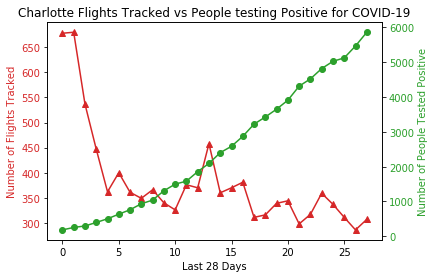

The correlation between both factors is -0.62


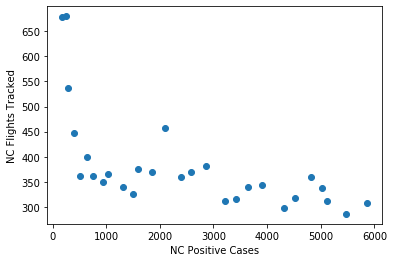

In [22]:
#charlotte tracked flights vs number of people testing positive of COVID-19

t = np.arange(0, 28.0, 1)
data1 = merge_df3['Charlotte Tracked Flights']
data2 = north_carolina_df4['positive']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Last 28 Days')
ax1.set_ylabel('Number of Flights Tracked', color=color)
ax1.plot(t, data1, color=color, marker='^', label='Tracked')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_ylabel('Number of People Tested Positive', color=color)
ax2.plot(t, data2, color=color, marker='o', label='People')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Charlotte Flights Tracked vs People testing Positive for COVID-19')
plt.show()
plt.savefig('Images/CharlotteFlightsvCOVID.png')

x_values = north_carolina_df4['positive']
y_values = merge_df3['Charlotte Tracked Flights']
plt.scatter(x_values,y_values)
plt.xlabel('NC Positive Cases')
plt.ylabel('NC Flights Tracked')
correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Images/corrNCvCovid')
plt.show()

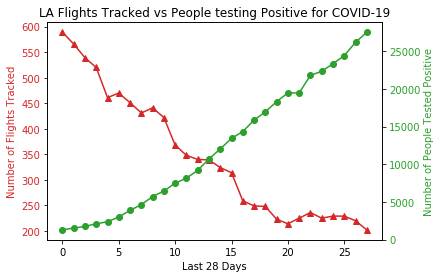

The correlation between both factors is -0.93


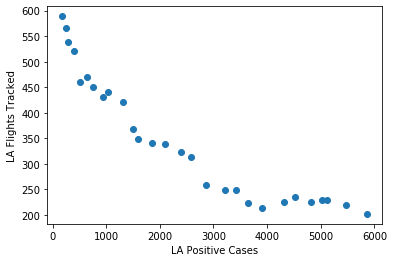

In [23]:
t = np.arange(0, 28.0, 1)
data7 = merge_df3['LA Tracked Flights']
data8 = LA_df4['positive']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Last 28 Days')
ax1.set_ylabel('Number of Flights Tracked', color=color)
ax1.plot(t, data7, color=color, marker='^', label='Tracked')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_ylabel('Number of People Tested Positive', color=color)
ax2.plot(t, data8, color=color, marker='o', label='People')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('LA Flights Tracked vs People testing Positive for COVID-19')
plt.show()
plt.savefig('Images/LAFlightsvCOVID.png')

x_values2 = north_carolina_df4['positive']
y_values2 = merge_df3['LA Tracked Flights']
plt.scatter(x_values2,y_values2)
plt.xlabel('LA Positive Cases')
plt.ylabel('LA Flights Tracked')
correlation = stats.pearsonr(x_values2,y_values2)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Images/corrLAvCovid')
plt.show()

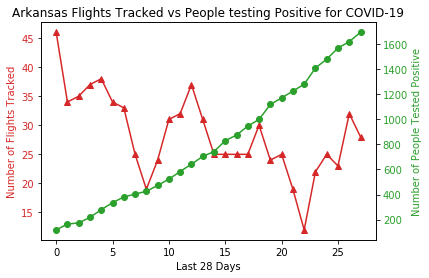

The correlation between both factors is -0.58


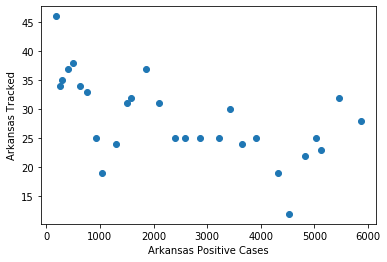

In [24]:
#Arkansas tracked flights vs number of people testing positive of COVID-19

t = np.arange(0, 28.0, 1)
data5 = merge_df3['Arkansas Tracked Flights']
data6 = Arkansas_df4['positive']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Last 28 Days')
ax1.set_ylabel('Number of Flights Tracked', color=color)
ax1.plot(t, data5, color=color, marker='^', label='Tracked')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_ylabel('Number of People Tested Positive', color=color)
ax2.plot(t, data6, color=color, marker='o', label='People')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Arkansas Flights Tracked vs People testing Positive for COVID-19')
plt.show()
plt.savefig('Images/ArkansasFlightsvCOVID.png')

x_values3 = north_carolina_df4['positive']
y_values3 = merge_df3['Arkansas Tracked Flights']
plt.scatter(x_values3,y_values3)
plt.xlabel('Arkansas Positive Cases')
plt.ylabel('Arkansas Tracked')
correlation = stats.pearsonr(x_values3,y_values3)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Images/corrArkansasvCovid')
plt.show()

In [25]:
#Numerical Summary
print("NC COVID-19 Summary")
print(north_carolina_df4.describe())
print("\n")

print("AR COVID-19 Summary")
print(Arkansas_df4.describe())
print("\n")

print("Charlotte Flight Summary")
print(CharlotteFlights_Data.describe())
print("\n")

print("LA Flight Summary")
print(LAXFlights_Data.describe())
print("\n")

print("Arkansas Flight Summary")
print(LittleRockchart_Data.describe())
print("\n")

NC COVID-19 Summary
               date     positive
count  2.800000e+01    28.000000
mean   2.020038e+07  2519.035714
std    4.151157e+01  1820.235872
min    2.020032e+07   184.000000
25%    2.020033e+07   892.000000
50%    2.020040e+07  2247.500000
75%    2.020041e+07  4009.000000
max    2.020042e+07  5859.000000


AR COVID-19 Summary
               date     positive
count  2.800000e+01    28.000000
mean   2.020038e+07   799.714286
std    4.151157e+01   488.522251
min    2.020032e+07   118.000000
25%    2.020033e+07   398.250000
50%    2.020040e+07   723.500000
75%    2.020041e+07  1184.750000
max    2.020042e+07  1695.000000


Charlotte Flight Summary
           DateTime  Scheduled flights  Tracked flights
count  3.000000e+01          30.000000        30.000000
mean   2.020038e+07         714.200000       373.400000
std    4.145492e+01          75.902115       100.647421
min    2.020032e+07         568.000000       249.000000
25%    2.020033e+07         648.000000       316.250000
5

Implications of our Findings:

    After reviewing our data, we noticed some trends. As COVID-19 positive cases increased in Charlotte,NC and LA,CA, there were a significant decrease in flights tracked. On the other hand, in Little Rock,AR, as COVID-19 positive cases increased, the number of tracked flights did not decrease as substantially. We can assume that the population flow in Charlotte,NC international airport is higher compared to Little Rock, AR national airport based on the two airport's volume of scheduled and tracked flights. This can potentially explain Charlotte, NC's more rapid increase in positive COVID-19 cases. 
    
    We suspect the dramatic decrease in flight tracked is due to new federal government regulations. Charlotte is an international airport and currently international travel is banned. We suspected that Charlotte,NC and LA,CA would be hit harder as a result of this. 